## 1. Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import pickle

## 2. Import data

In [31]:
data = pd.read_csv(r"C:\Users\03ank\Projects\Credit card default prediction\Credit-Card-Default-Prediction\Training_FileFromDB\InputFile.csv")

## 3. Data analysis

In [32]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [19]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Defaulter'],
      dtype='object')

In [35]:
# Replace column names
data.rename(columns={'PAY_0':'PAY_1','default_payment_next_month':'Defaulter'},inplace=True)

In [36]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [27]:
# remove unwanted cells
data.drop(['ID'],axis=1,inplace=True)

In [28]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,NaN
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,NaN
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NaN
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NaN
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NaN


In [12]:
data.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
data.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [7]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Defaulter    0
dtype: int64

In [7]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


## 4. Data Profilling

In [ ]:
pp.ProfileReport(data)

In [ ]:
sns.pairplot(data)

### a. Bivariate analysis

### a.1 Sex

In [17]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [20]:
data['Defaulter'].groupby(data['SEX']).value_counts()

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
Name: Defaulter, dtype: int64

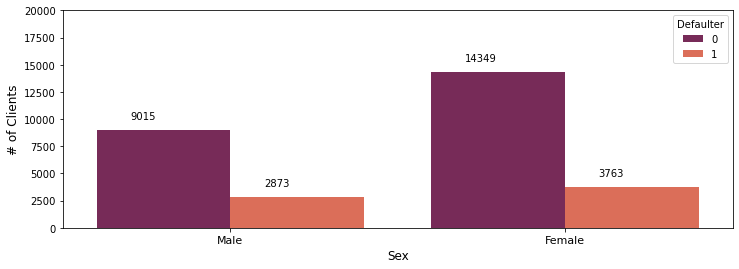

In [23]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'SEX', hue="Defaulter", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+1000))

Apparently, there are more women than men in this dataset and chances that women will default is higher

### a.2 EDUCATION

In [24]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
data['Defaulter'].groupby(data['EDUCATION']).value_counts()

EDUCATION  Defaulter
0          0               14
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
4          0              116
           1                7
5          0              262
           1               18
6          0               43
           1                8
Name: Defaulter, dtype: int64

There are few people on the 'unknown' categories (0, 5, 6) and, although their probabilities of default are not exactly close, all of them are lower than the probabilities found for the 'well defined' labels (1, 2 and 3). I'll be making the choice of putting them together with the same value

In [8]:
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(0,4)
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(5,4)
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(6,4)

In [9]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

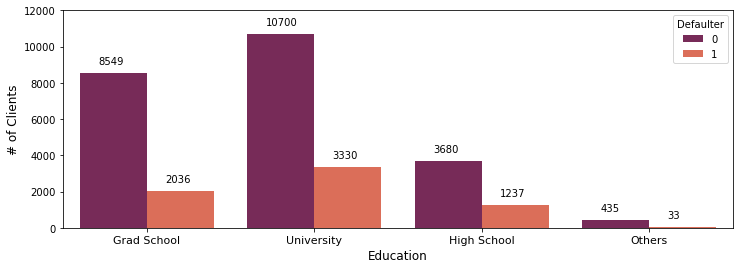

In [24]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'EDUCATION', hue="Defaulter", palette = 'rocket')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

Education level in this dataset are Graduate School, University, High School.


### a.3 MARRIAGE

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

In [81]:
data['Defaulter'].groupby(data['MARRIAGE']).value_counts()

MARRIAGE  Defaulter
0         0               49
          1                5
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              239
          1               84
Name: Defaulter, dtype: int64

Since there are 2 categories of other, I will combine them and rename it as 0 = 'others'

In [82]:
data.loc[:,'MARRIAGE'] = data.loc[:,'MARRIAGE'].replace(3,0)

In [83]:
data['Defaulter'].groupby(data['MARRIAGE']).value_counts()

MARRIAGE  Defaulter
0         0              288
          1               89
1         0            10453
          1             3206
2         0            12623
          1             3341
Name: Defaulter, dtype: int64

([<matplotlib.axis.XTick at 0x1a508f04dc0>,
 [Text(0, 0, 'Unknown'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

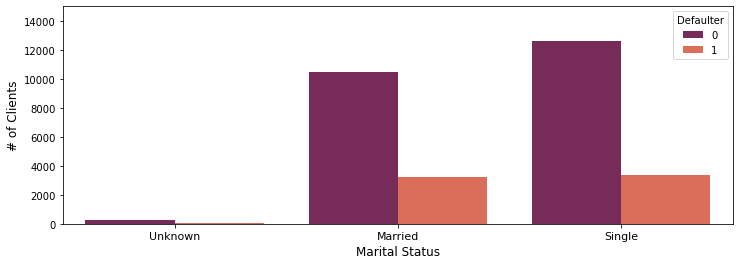

In [36]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data=data,x='MARRIAGE',hue='Defaulter',palette='rocket')
plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Unknown', 'Married', 'Single'], fontsize = 11)

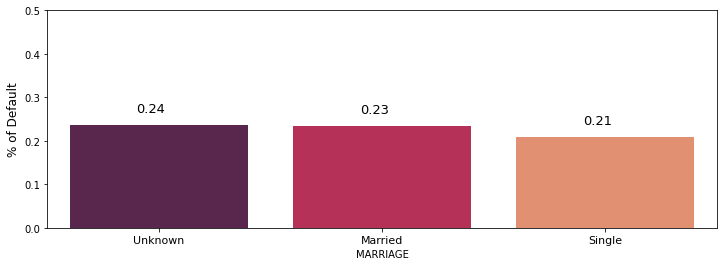

In [39]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "Defaulter", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Unknown', 'Married', 'Single'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

People in unknown category are likely to default

### a.4 SEX and EDUCATION/MARRIAGE

In [41]:
data.groupby(by=['MARRIAGE','SEX'])['Defaulter'].value_counts()

MARRIAGE  SEX  Defaulter
0         1    0             103
               1              42
          2    0             185
               1              47
1         1    0            3844
               1            1346
          2    0            6609
               1            1860
2         1    0            5068
               1            1485
          2    0            7555
               1            1856
Name: Defaulter, dtype: int64

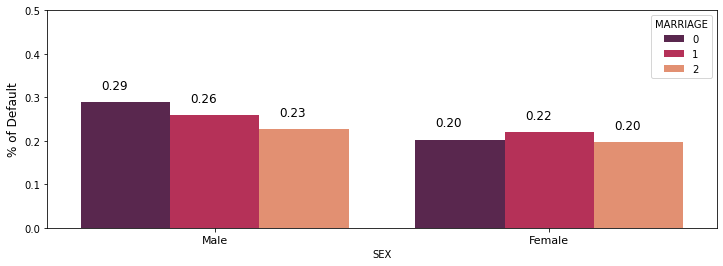

In [59]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=data,x='SEX',y='Defaulter',hue='MARRIAGE',palette='rocket',ci=None)
plt.xticks([0,1],['Male','Female'],fontsize=11)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()),(p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

In [42]:
data.groupby(by=['EDUCATION','SEX'])['Defaulter'].value_counts()

EDUCATION  SEX  Defaulter
1          1    0            3448
                1             906
           2    0            5101
                1            1130
2          1    0            3966
                1            1408
           2    0            6734
                1            1922
3          1    0            1445
                1             545
           2    0            2235
                1             692
4          1    0             156
                1              14
           2    0             279
                1              19
Name: Defaulter, dtype: int64

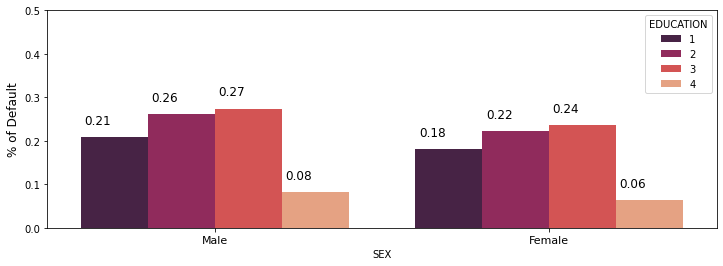

In [56]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=data,x='SEX',y='Defaulter',hue='EDUCATION',palette='rocket',ci=None)
plt.xticks([0,1],['Male','Female'],fontsize=11)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()),(p.get_x()+0.01, p.get_height()+0.03),fontsize=12)

In every case, probability of men to default is high

### a.5 Age

In [34]:
(data[data.loc[:,'Defaulter']==1][['AGE']])

,AGE
0,24
1,26
13,30
16,24
21,39
...,...
29991,34
29994,34
29997,37
29998,41


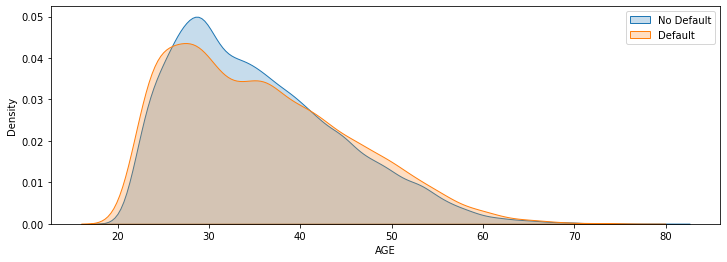

In [30]:
plt.figure(figsize=(12,4))

sns.kdeplot(data=data[data.loc[:,'Defaulter']==0]['AGE'],label = 'No Default', shade = True)
sns.kdeplot(data=data[data.loc[:,'Defaulter']==1]['AGE'],label = 'Default', shade = True)
plt.legend()
plt.show()

As seen, the probability that people between age group 20-30 have higher chances to default than others, to prove this lets divide age in bins and check

In [86]:
data['Agebin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])

In [87]:
data['Defaulter'].groupby(data['Agebin']).value_counts(normalize=True)

Agebin    Defaulter
(20, 25]  0            0.733402
          1            0.266598
(25, 30]  0            0.798516
          1            0.201484
(30, 35]  0            0.805728
          1            0.194272
(35, 40]  0            0.783811
          1            0.216189
(40, 50]  0            0.767027
          1            0.232973
(50, 60]  0            0.747621
          1            0.252379
(60, 80]  0            0.731618
          1            0.268382
Name: Defaulter, dtype: float64

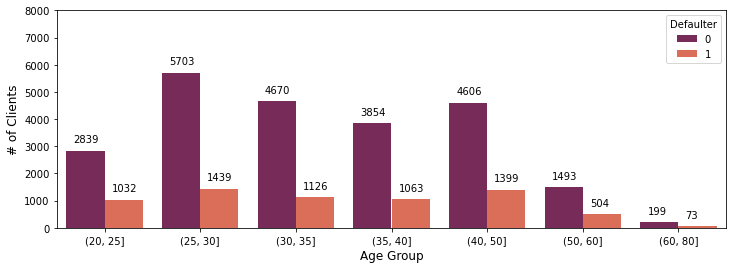

In [97]:
plt.figure(figsize=(12,4))
data['Agebin'] = data['Agebin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']
ax = sns.countplot(data=data, x='Agebin',hue='Defaulter',palette='rocket',order=AgeBin_order)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

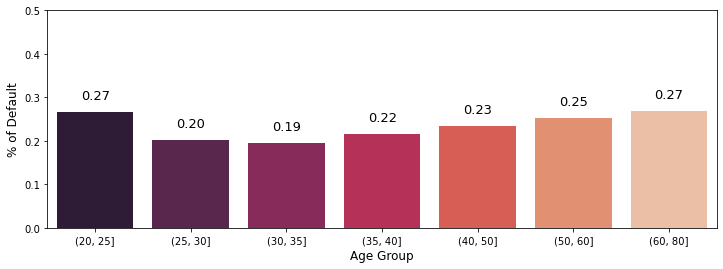

In [94]:
plt.figure(figsize=(12,4))

ax = sns.barplot(data=data, x='Agebin',y='Defaulter',palette='rocket',order=AgeBin_order,ci = None)
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

As seen, lowest chances of default is at age group (30,35) and highest in (20,25) and 60+.

### a.6 LIMIT_BALANCE

C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

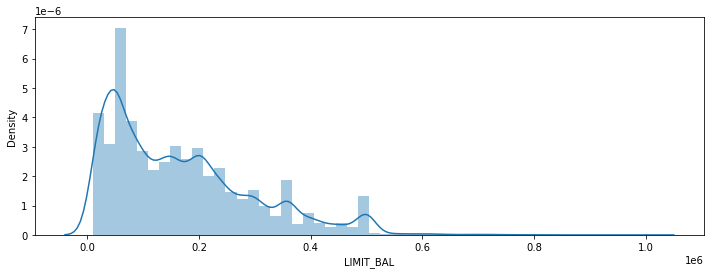

In [44]:
plt.figure(figsize=(12,4))

sns.distplot(data['LIMIT_BAL'])

In [50]:
data[data.loc[:,'Defaulter']==1][['LIMIT_BAL']]

,LIMIT_BAL
0,20000.0
1,120000.0
13,70000.0
16,20000.0
21,120000.0
...,...
29991,210000.0
29994,80000.0
29997,30000.0
29998,80000.0


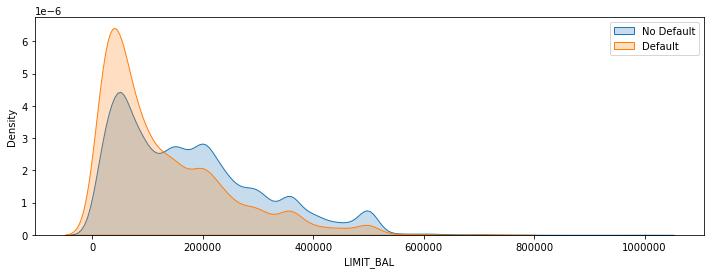

In [59]:
plt.figure(figsize=(12,4))

sns.kdeplot(data[data.loc[:,'Defaulter']==0]['LIMIT_BAL'],label = 'No Default', shade = True)
sns.kdeplot(data[data.loc[:,'Defaulter']==1]['LIMIT_BAL'],label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

Most customers have 200k or less of credit limit. And it seems that we will find a higher concentration of customers are default on that range. We will split it into bins to get a clear look.

In [62]:
data['Limit_bal_bin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['Limit_bal_bin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: Limit_bal_bin, dtype: int64


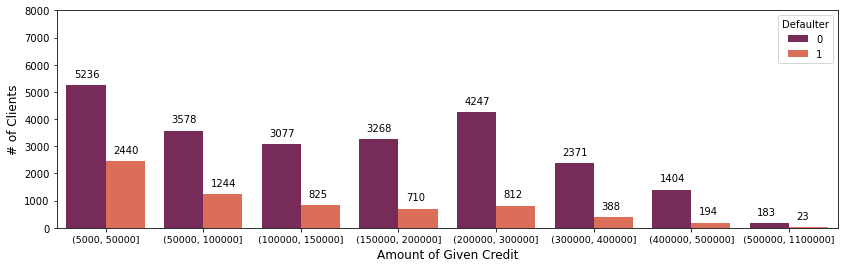

In [63]:
plt.figure(figsize=(14,4))

data['Limit_bal_bin'] = data['Limit_bal_bin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = data, x = 'Limit_bal_bin', hue="Defaulter", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

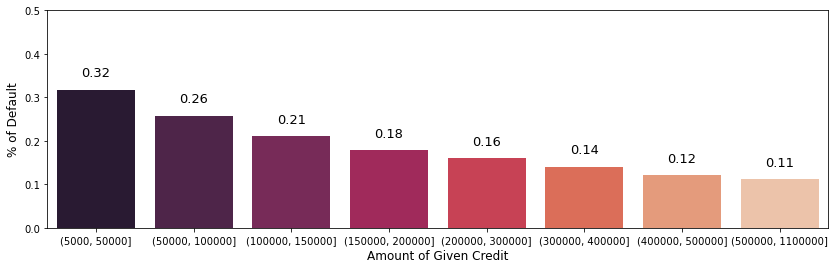

In [64]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "Limit_bal_bin", y = "Defaulter", data = data, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Clearly visible that people of credit limit b/w 5000 - 50000 have more chances to default. Also it is seen that higher the limit less chances of defaulting.

### a.7 LIMIT_BAL and General Features

In [75]:
data['LIMIT_BAL'].groupby(data['EDUCATION']).mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64

([<matplotlib.axis.XTick at 0x297d7c5a850>,
 [Text(0, 0, 'Grad School'),
  Text(1, 0, 'University'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Others')])

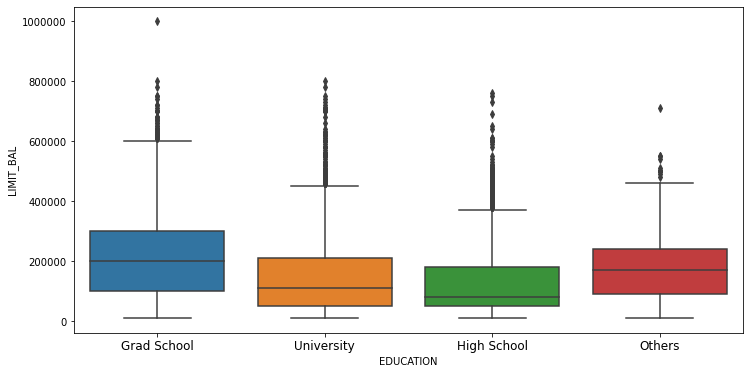

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',data=data)
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 12)

In [74]:
data['LIMIT_BAL'].groupby(data['SEX']).mean()

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64

([<matplotlib.axis.XTick at 0x297d7b49a60>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

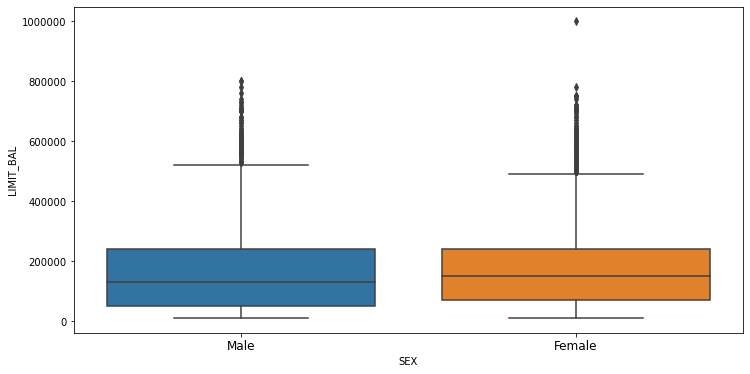

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x='SEX',y='LIMIT_BAL',data=data)
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

In [78]:
data['LIMIT_BAL'].groupby(data['MARRIAGE']).mean()

MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

([<matplotlib.axis.XTick at 0x297d7f54a90>,
 [Text(0, 0, 'Unknown'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

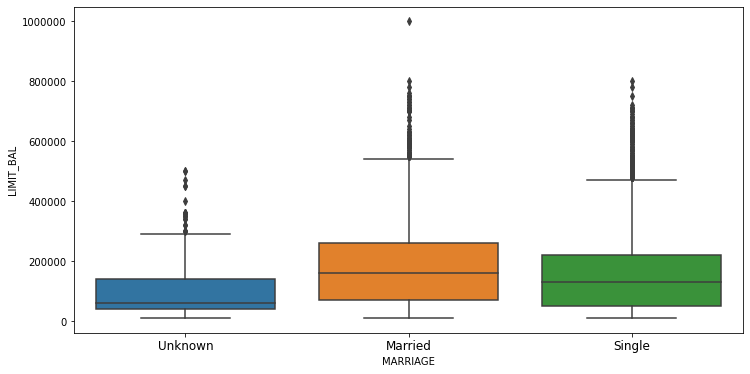

In [84]:
plt.figure(figsize=(12,6))

sns.boxplot(data=data,x='MARRIAGE',y='LIMIT_BAL')
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Unknown', 'Married', 'Single'], fontsize = 12)

In [88]:
data['LIMIT_BAL'].groupby(data['Agebin']).mean()

Agebin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

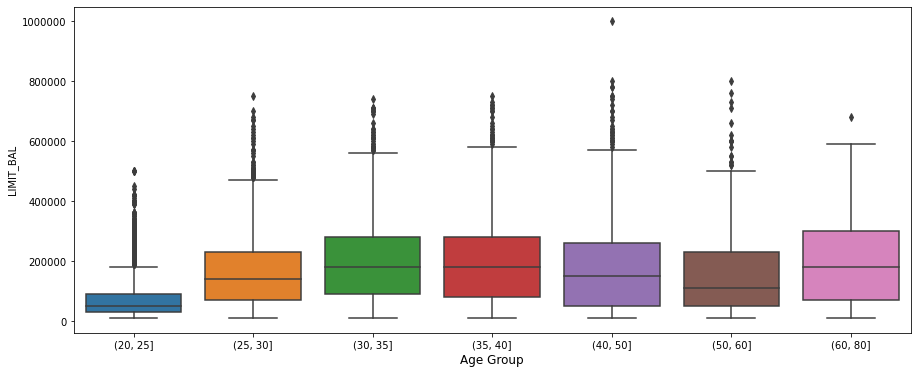

In [100]:
plt.figure(figsize=(15,6))

sns.boxplot(data=data,x='Agebin',y='LIMIT_BAL',order = AgeBin_order)
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)
plt.show()

([<matplotlib.axis.XTick at 0x297da2b3d90>,
 [Text(0, 0, 'Grad School'),
  Text(1, 0, 'University'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Others')])

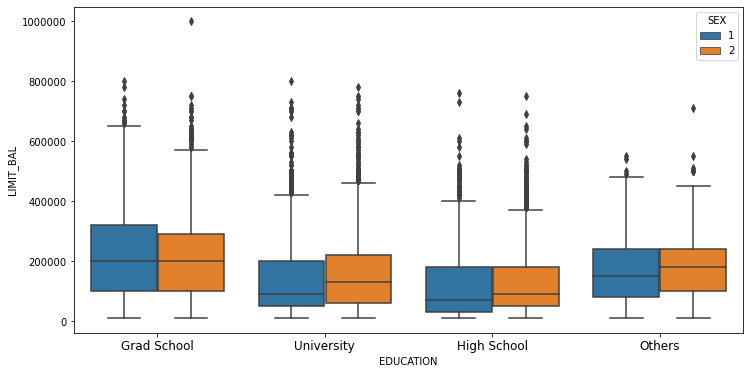

In [101]:
plt.figure(figsize=(12,6))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='SEX',data=data)
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 12)

([<matplotlib.axis.XTick at 0x297da3ad460>,
 [Text(0, 0, 'Unknown'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

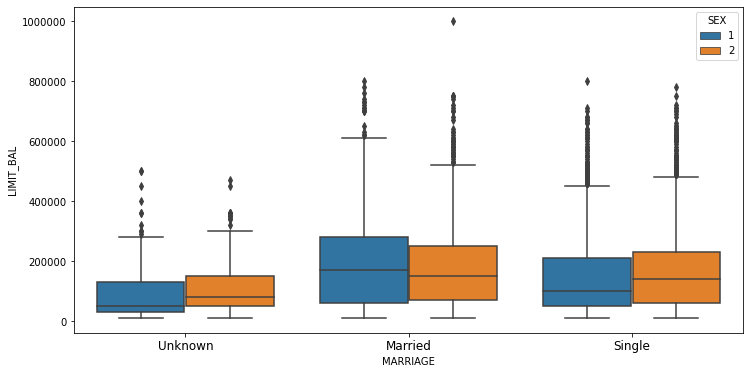

In [102]:
plt.figure(figsize=(12,6))

sns.boxplot(data=data,x='MARRIAGE',y='LIMIT_BAL',hue='SEX')
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Unknown', 'Married', 'Single'], fontsize = 12)

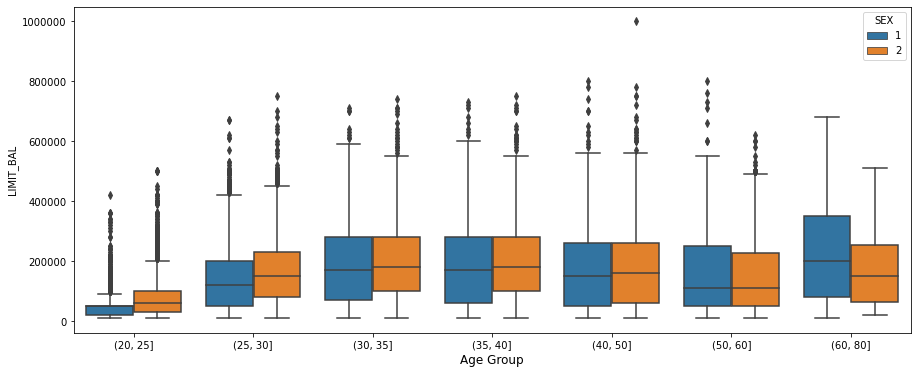

In [103]:
plt.figure(figsize=(15,6))

sns.boxplot(data=data,x='Agebin',y='LIMIT_BAL',hue='SEX', order = AgeBin_order)
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)
plt.show()

Visible that avg credit limit of women are higher then men, except for the below categories:

1. are 50+ year old
2. are married
3. have graduate degree

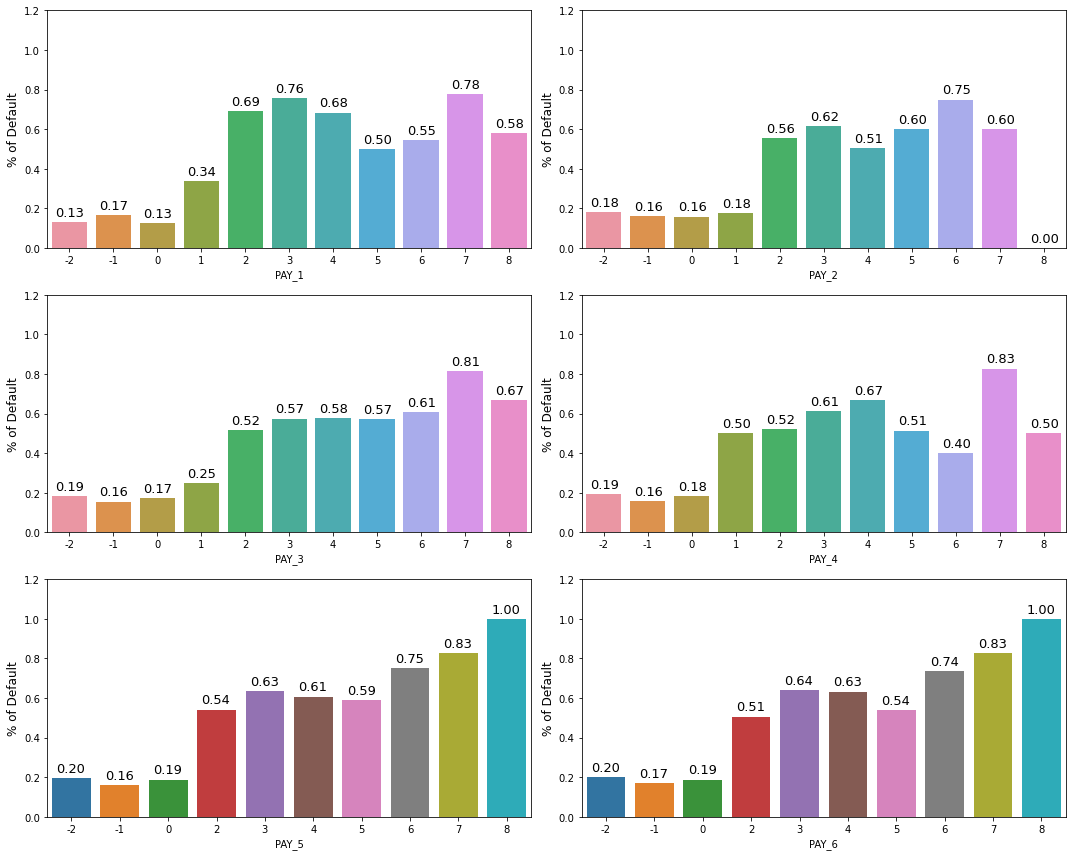

In [119]:
plt.figure(figsize=(15,12))
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i,cols in enumerate(pay_x_fts):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x=cols,y='Defaulter',data=data,ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

there are only a few customers with 4+ months of delay in all PAY_X features

###  Amount of Bill Statement

C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

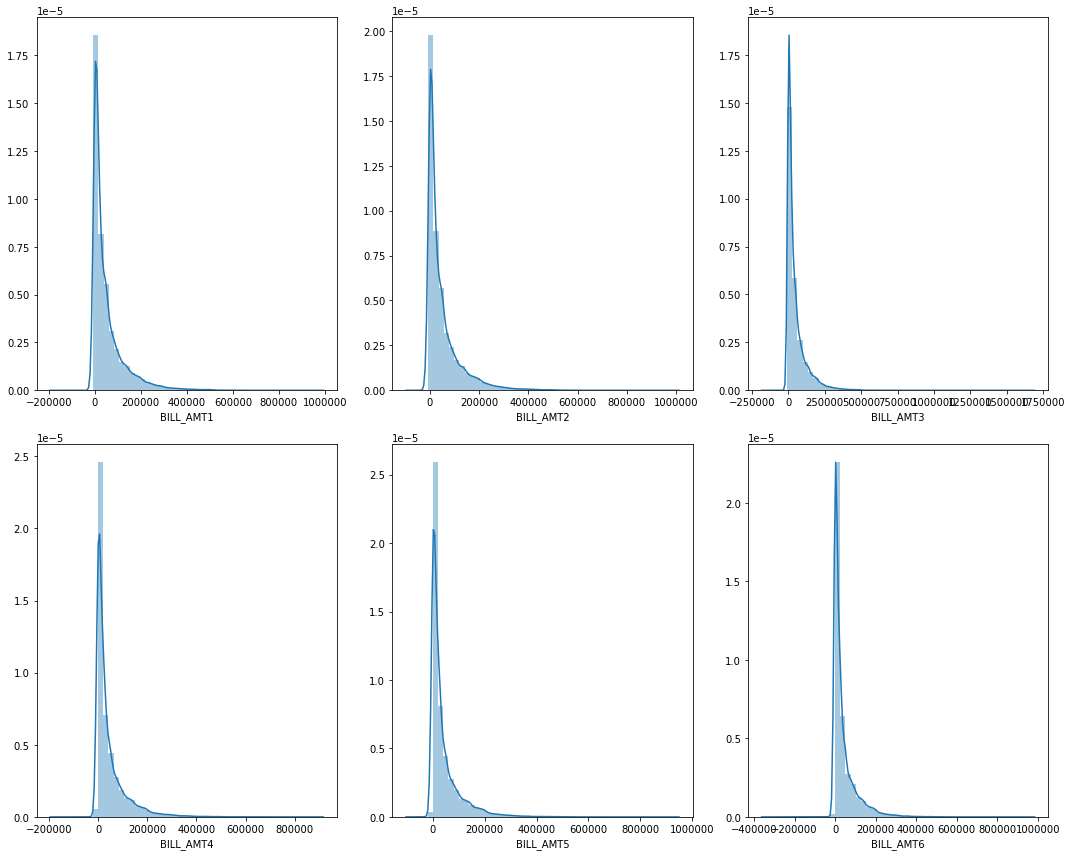

In [26]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,cols in enumerate(bill_amtx_fts):
    plt.subplot(2,3,i+1)
    sns.distplot(data.loc[:,cols])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

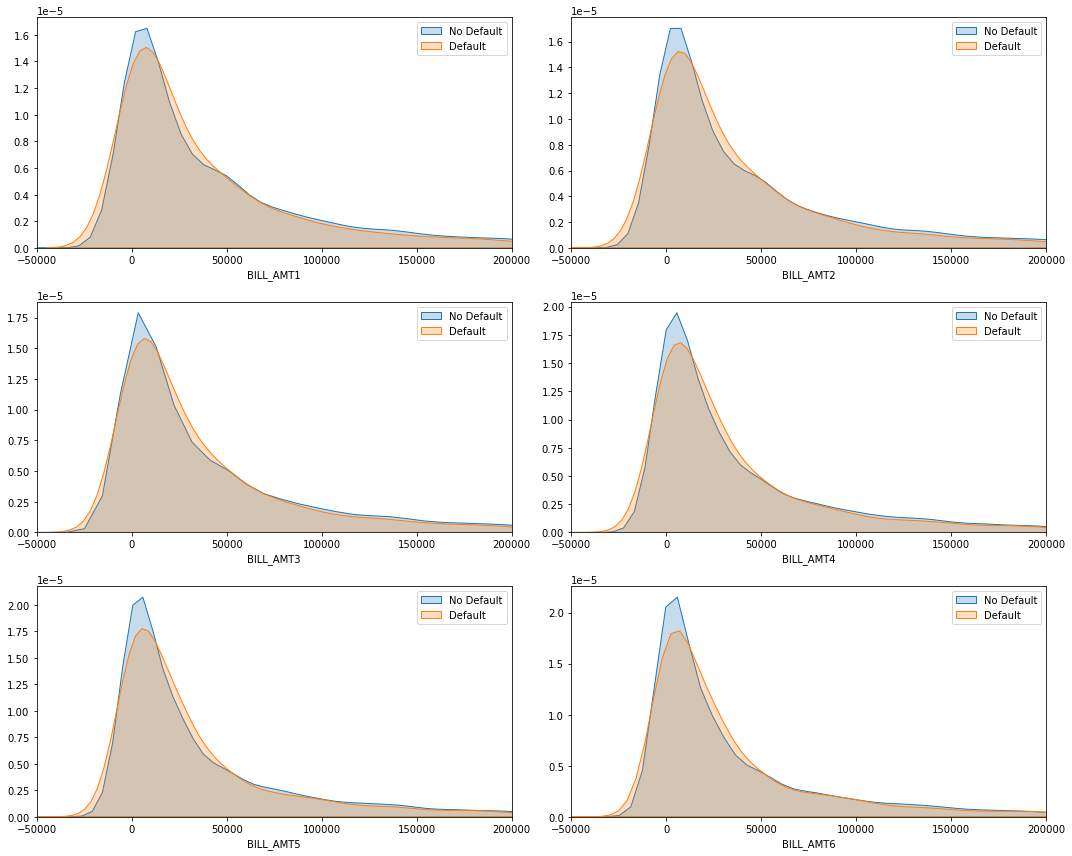

In [29]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['Defaulter'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['Defaulter'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [31]:
data['BILL_AMT1_bin'] = data['BILL_AMT1'].copy()
data['BILL_AMT2_bin'] = data['BILL_AMT2'].copy()
data['BILL_AMT3_bin'] = data['BILL_AMT3'].copy()
data['BILL_AMT4_bin'] = data['BILL_AMT4'].copy()
data['BILL_AMT5_bin'] = data['BILL_AMT5'].copy()
data['BILL_AMT6_bin'] = data['BILL_AMT6'].copy()

In [33]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    data[col] = pd.cut(data[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(data[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

In [36]:
for col in bill_amtx_bins:
    print(data['Defaulter'].groupby(data[col]).value_counts(normalize = True))

BILL_AMT1_bin      Defaulter
(-350000, -1]      0            0.815254
                   1            0.184746
(-1, 0]            0            0.734064
                   1            0.265936
(0, 25000]         0            0.774470
                   1            0.225530
(25000, 75000]     0            0.775209
                   1            0.224791
(75000, 200000]    0            0.802396
                   1            0.197604
(200000, 2000000]  0            0.797111
                   1            0.202889
Name: Defaulter, dtype: float64
BILL_AMT2_bin      Defaulter
(-350000, -1]      0            0.810164
                   1            0.189836
(-1, 0]            0            0.753791
                   1            0.246209
(0, 25000]         0            0.775836
                   1            0.224164
(25000, 75000]     0            0.773531
                   1            0.226469
(75000, 200000]    0            0.799176
                   1            0.200824
(200000,

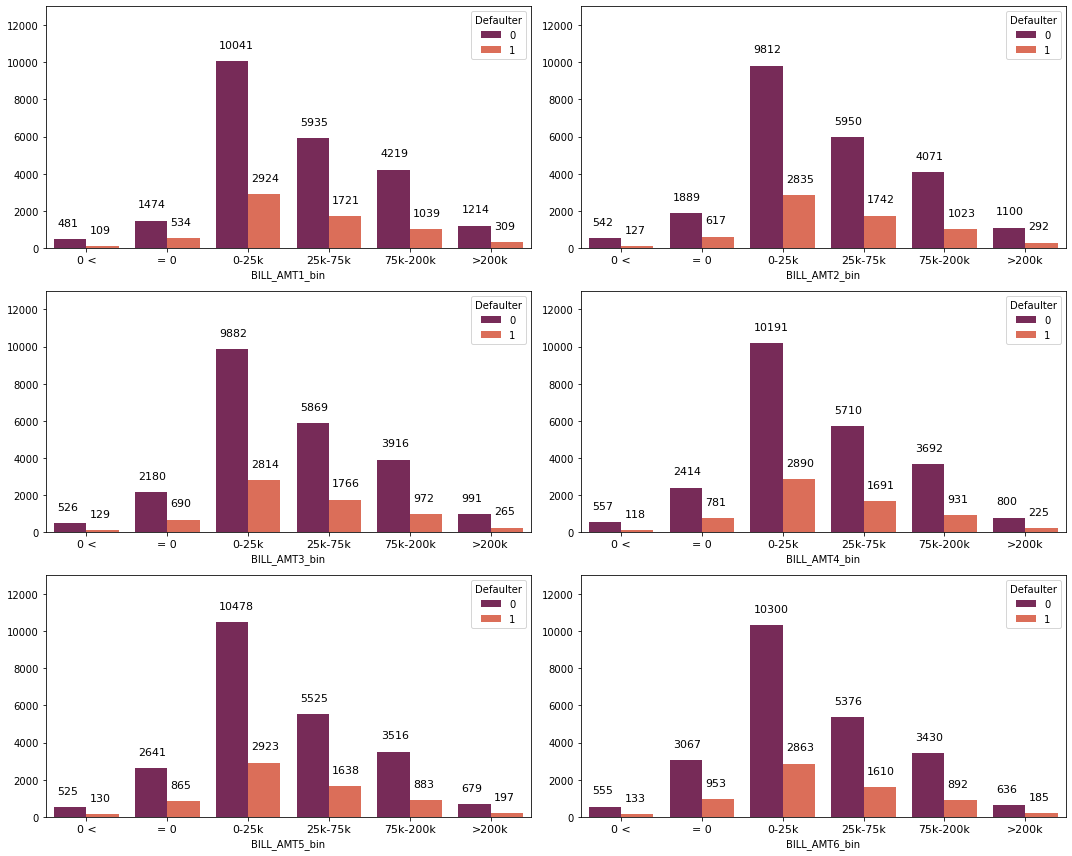

In [40]:
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, hue="Defaulter", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)    
        
plt.show()

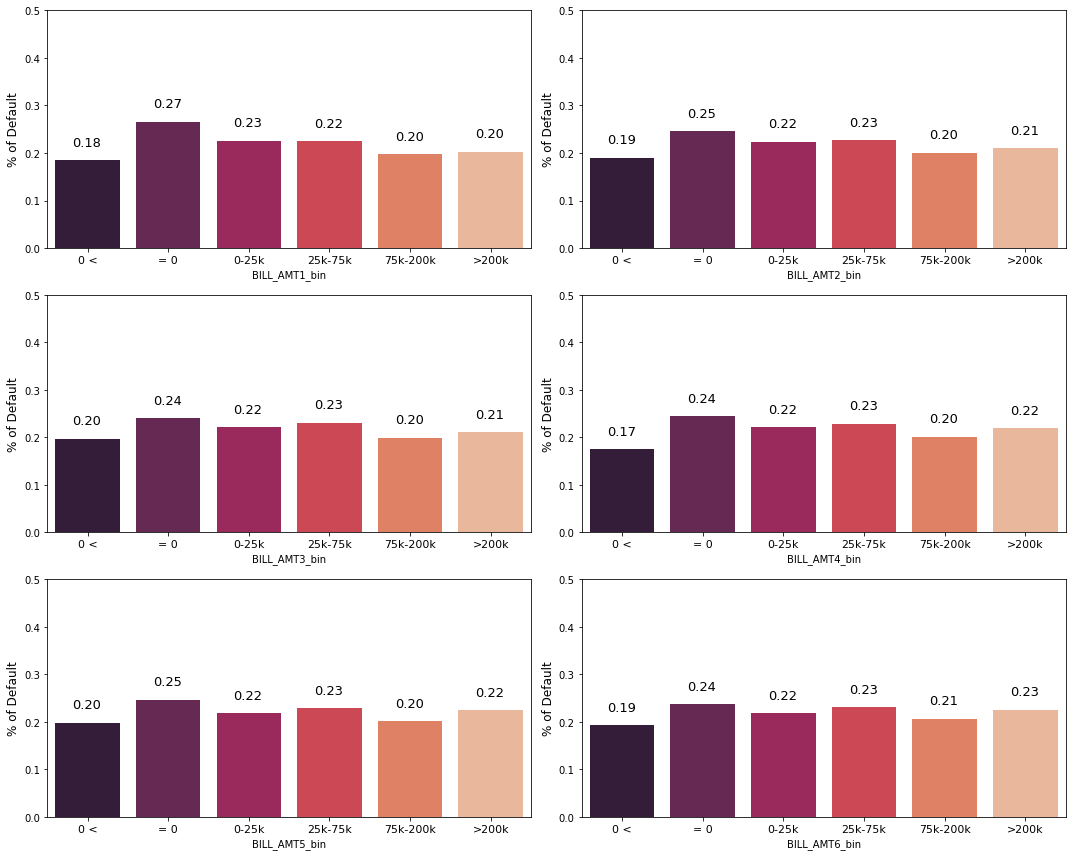

In [41]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Defaulter", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

negative bill statementhave less chances of defaulting 

### Amount of Previous Payment

C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\03ank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

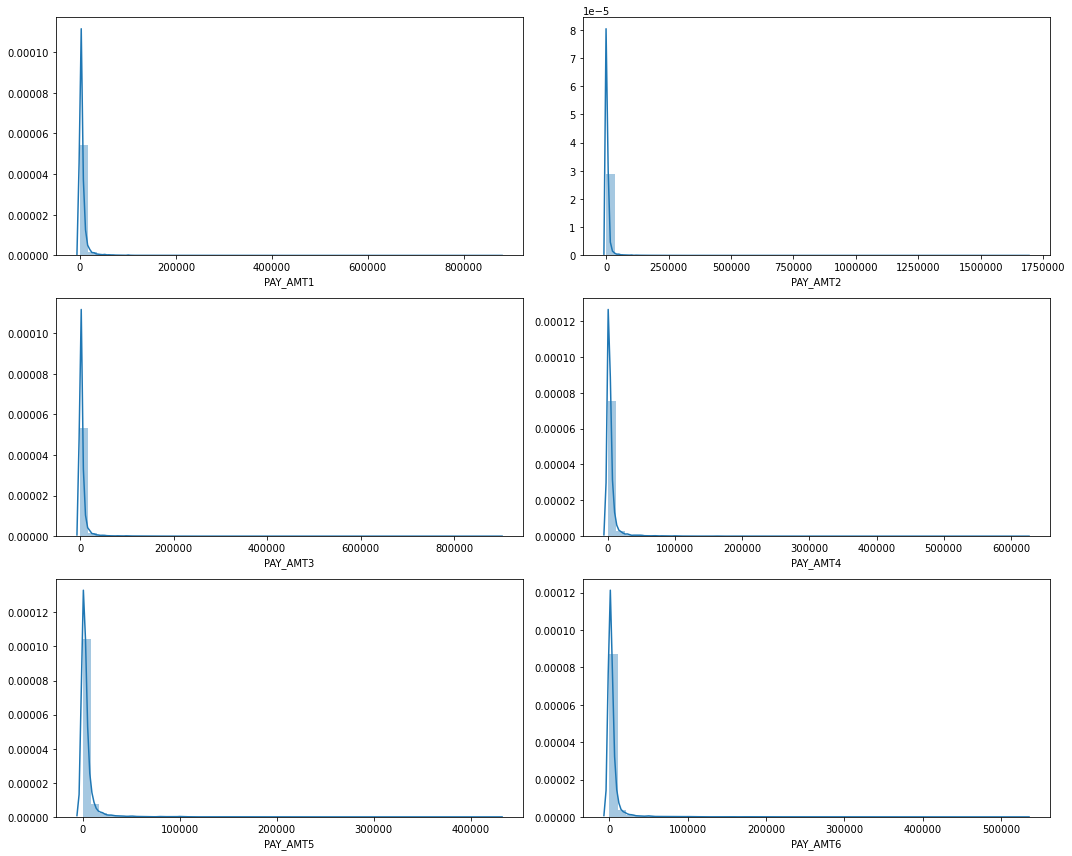

In [42]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,cols in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,cols])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

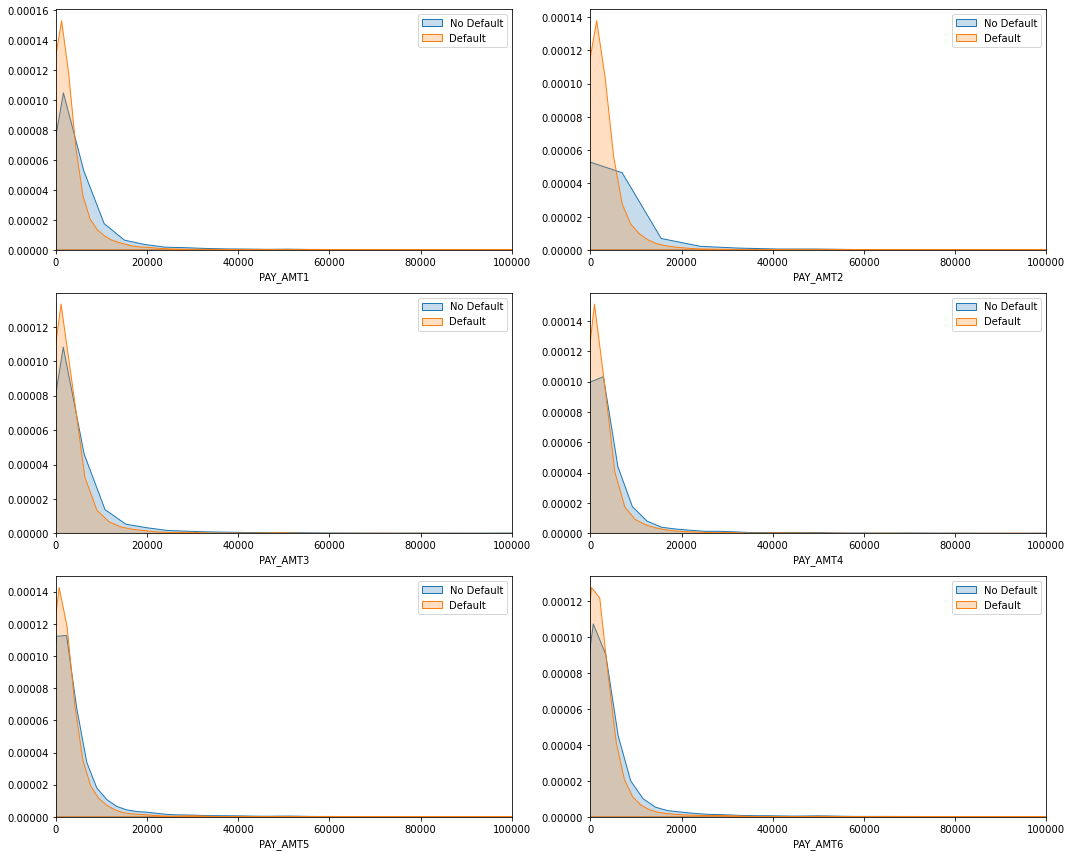

In [44]:
plt.figure(figsize=(15,12))

for i,cols in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['Defaulter'] == 0), cols], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['Defaulter'] == 1), cols], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [45]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [47]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, cols in enumerate (pay_amtx_bins):
    data[cols] = pd.cut(data[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(data[cols].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

In [48]:
for cols in pay_amtx_bins:
    print(data['Defaulter'].groupby(data[cols]).value_counts(normalize = True))

PAY_AMT1_bin       Defaulter
(-1, 0]            0            0.640503
                   1            0.359497
(0, 25000]         0            0.803582
                   1            0.196418
(25000, 50000]     0            0.910909
                   1            0.089091
(50000, 100000]    0            0.919255
                   1            0.080745
(100000, 2000000]  0            0.912752
                   1            0.087248
Name: Defaulter, dtype: float64
PAY_AMT2_bin       Defaulter
(-1, 0]            0            0.666605
                   1            0.333395
(0, 25000]         0            0.797997
                   1            0.202003
(25000, 50000]     0            0.926259
                   1            0.073741
(50000, 100000]    0            0.936396
                   1            0.063604
(100000, 2000000]  0            0.913265
                   1            0.086735
Name: Defaulter, dtype: float64
PAY_AMT3_bin       Defaulter
(-1, 0]            0         

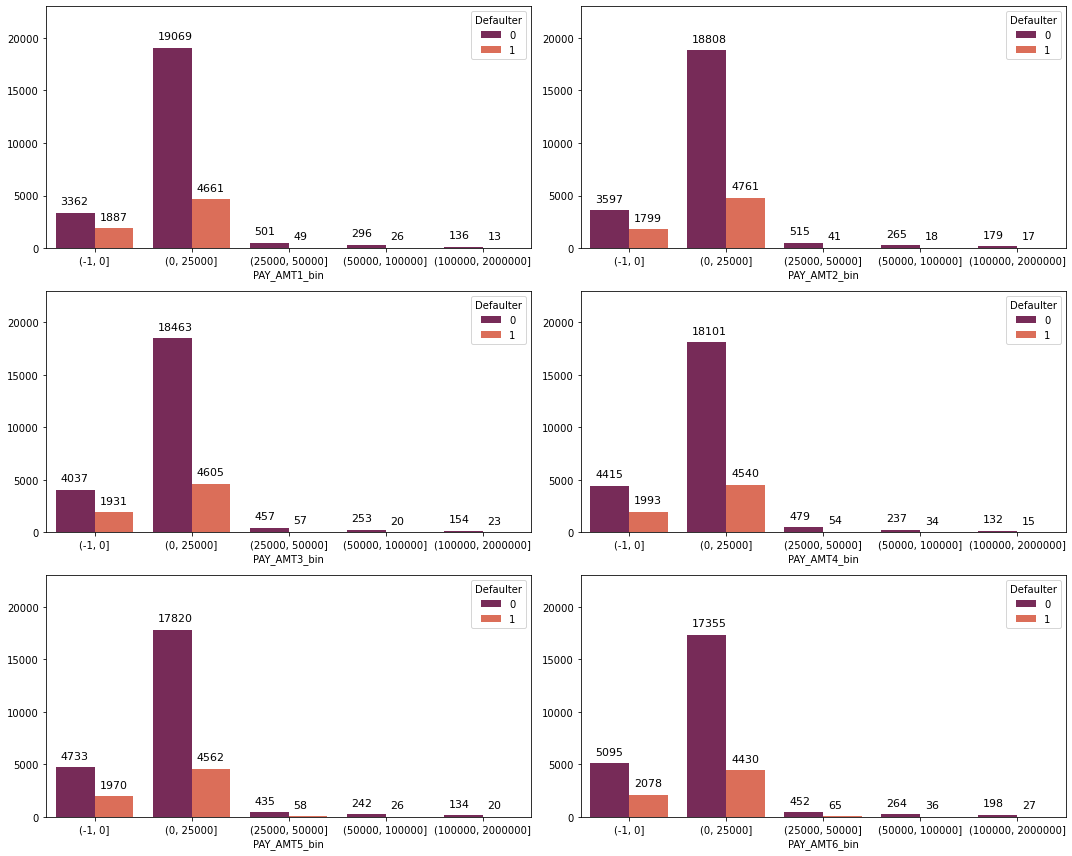

In [49]:
plt.figure(figsize=(15,12))

for i,cols in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = cols, hue="Defaulter", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)    

plt.show()

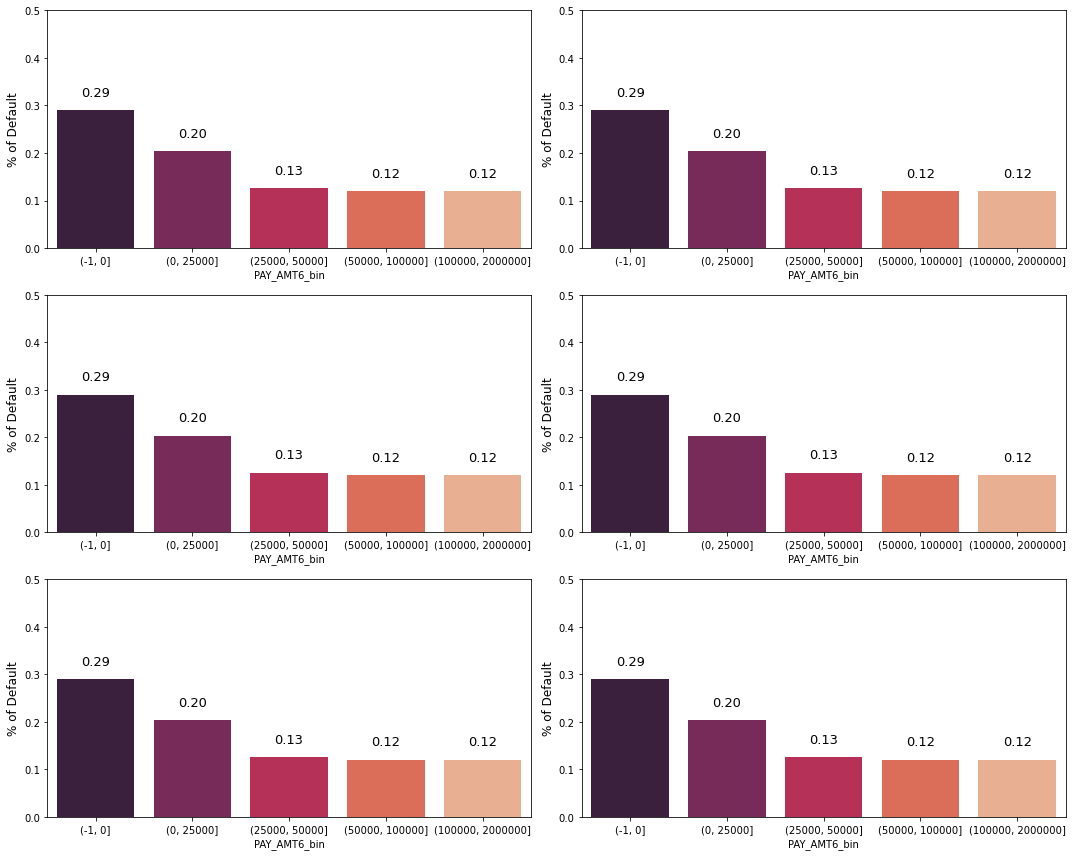

In [50]:
plt.figure(figsize=(15,12))

for i,cols in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Defaulter", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

There is a higher default rate among those who paid nothing in previous months and lower rates among those paid over 25k of NT dollars.

## 5. Conclusions:

1. No missing values in the dataset
2. No categorical data
3. There are few columns that are highly corelated
4. pay_0 is corelated with pay_2,pay_3,pay_4,pay_5,pay_6
5. pay_2 is corelated with pay_0,pay_3,pay_4,pay_5,pay_6
6. pay_3 is corelated with pay_0,pay_2,pay_4,pay_5,pay_6
7. pay_4 is corelated with pay_0,pay_2,pay_3,pay_5,pay_6
8. pay_5 is corelated with pay_0,pay_2,pay_3,pay_4,pay_6
9. pay_6 is corelated with pay_0,pay_2,pay_3,pay_4,pay_5
10. BILL_AMT1 is corelated with BILL_AMT2, BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
11. BILL_AMT2 is corelated with BILL_AMT1, BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
12. BILL_AMT3 is corelated with BILL_AMT1, BILL_AMT2,BILL_AMT4,BILL_AMT5,BILL_AMT6
13. BILL_AMT4 is corelated with BILL_AMT1, BILL_AMT2,BILL_AMT3,BILL_AMT5,BILL_AMT6
14. BILL_AMT5 is corelated with BILL_AMT1, BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6
15. BILL_AMT6 is corelated with BILL_AMT1, BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT6